Hit Ratio: 40/100 = 40%

<- 5.097829103469849 seconds ->

Tested                    found


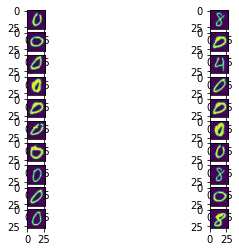

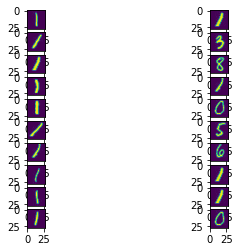

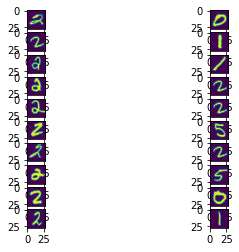

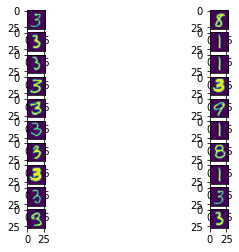

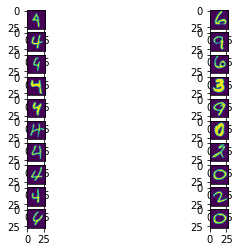

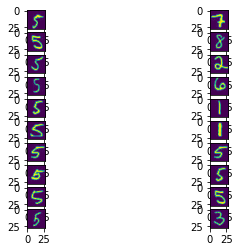

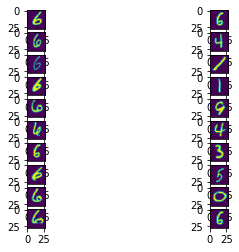

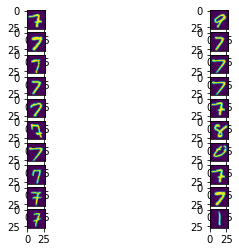

In [ ]:
import time
import matplotlib.pyplot as plt

def R_Projection(image): #Sum of the rows for single image
    p = []
    for x in range(width):
        value = 0
        for y in range(width):
            value += (Raw_Data[image][x][y])
        p.insert(x, value)
        Row_Projections.insert(image,p)
        
def C_Projection(image): #Sum of the columns for single image
    c = []
    for x in range(width):
        value = 0
        for y in range(width):
            value += (Raw_Data[image][y][x])
        c.insert(x, value)
        Column_Projections.insert(image,c)
        
def D_Projection(image): #Sum of the diagonal for single image
    d = []
    value = 0
    for x in range(width):
        value += (Raw_Data[image][x][x])
        d.insert(x, value)
        Diagonal_Projections.insert(image,d)
        
def R_Barcode(image): #Binary conversion of row projections
    rb = []
    sum = 0
    for x in range(28):
        sum += Row_Projections[image][x] #Sum of all row projections
    
    for x in range(28):
        rb_threshold = Row_Projections[image][x]/sum
        
        if rb_threshold >= threshold:
            rb.insert(x,1)
        else:
            rb.insert(x,0)
            
        Row_Barcode.insert(image,rb)
        
def C_Barcode(image): #Binary conversion of column projections
    cb = []
    sum = 0
    for x in range(28):
        sum += Column_Projections[image][x] #Sum of all column projections
    
    for x in range(28):
        cb_threshold = Column_Projections[image][x]/sum
        
        if cb_threshold >= threshold:
            cb.insert(x,1)
        else:
            cb.insert(x,0)
            
        Column_Barcode.insert(image,cb)
        
def D_Barcode(image): #Binary conversion of Diagonal projections
    db = []
    sum = 0
    for x in range(28):
        sum += Diagonal_Projections[image][x] #Sum of Diagonal projections
    
    for x in range(28):
        db_threshold = Diagonal_Projections[image][x]/sum
        
        if db_threshold >= threshold:
            db.insert(x,1)
        else:
            db.insert(x,0)
            
        Diagonal_Barcode.insert(image,db)
        
def Barcode_Parse(image): #Adds the previous barcodes into one
    for x in range(width):
        Full_Barcode[image][x] = Row_Barcode[image][x]
        
    for y in range(width,width*2):
        Full_Barcode[image][y] = Column_Barcode[image][y-width]
        
    for z in range(width*2,width*3):
        Full_Barcode[image][z] = Diagonal_Barcode[image][z-(width*2)]
        
def Compare(index): #compare all 100 images with each other
    for A in range(100):
        if index == A: #Exclude the same image 
            continue
        correct = 0
        for B in range(width*3):
            if Full_Barcode[index][B] == Full_Barcode[A][B]:
                correct += 1
         
        Temp_Correct_List[A] = correct
        
    max_value = max(Temp_Correct_List)
    best_index = Temp_Correct_List.index(max_value)
    Best_Image[index] = best_index 
    
if __name__ == '__main__':
    
    start_time = time.time() #timer variable
    from PIL import Image

    width,height = (28,28) #image size
    pictures = 100
    image = 0 #starting picture
    threshold = 0.025 #threshold for converting into binary
    
    #Initialize 3D array for raw data
    Raw_Data = [[[0 for i in range(width)] for j in range(height)]for k in range(pictures)] #28 by 28 pixels, for 100 images

    #Initialize 2D array for Row Projections
    Row_Projections = [[0 for i in range(width)] for j in range(pictures)] 
    
    #Initialize 2D array for Column Projections
    Column_Projections = [[0 for i in range(width)] for j in range(pictures)] 
    
    #Initialize 2D array for Diagonal Projections
    Diagonal_Projections = [[0 for i in range(width)] for j in range(pictures)]
   
    #Initialize 2D array for Row Barcode 
    Row_Barcode = [[0 for i in range(width)] for j in range(pictures)] 
    
    #Initialize 2D array for Column Barcode 
    Column_Barcode = [[0 for i in range(width)] for j in range(pictures)] 
    
    #Initialize 2D array for Diagonal Barcode 
    Diagonal_Barcode = [[0 for i in range(width)] for j in range(pictures)] 
    
    #Initialize 2D array for Full Barcode 
    Full_Barcode = [[0 for i in range(width*3)] for j in range(pictures)]
    
    #Initialize temporary 1D array for correct barcode
    Temp_Correct_List = [0 for i in range(pictures)]
    
    #Initialize 1D array for best image comparison
    Best_Image = [0 for i in range(pictures)] 

    #Iterate through all images
    for A in range (10): #sub folder
        for B in range (10): #image
            img = Image.open("MNIST_DS/"+ str(A) +"/"+ str(B) +".jpg")
            pixel = img.load()
      
            for y in range (width):
                for x in range (height):
                    Raw_Data[image][x][y] = pixel[x,y] #load pixels from images to all_Data[image number][width][height]
                    
            #Calculate projections
            R_Projection(image)
            C_Projection(image)
            D_Projection(image)
            
            #Convert projections into binary
            R_Barcode(image)
            C_Barcode(image)
            D_Barcode(image)
            
            #Parsing binary into barcode 
            Barcode_Parse(image)
            
            image += 1 #Next Image
            
    #Comparing images (search)
    for index in range (100):
        Compare(index)         
    
    #Calculate Accuracy
    Success = 0
    for x in range(pictures):
        if Best_Image[x]//10 == x//10: #Finds if images are in same class
            Success += 1
        if Best_Image[x]%10 == 0: #Same thing but for starting class ex 20, 40, 70
            if int(((Best_Image[x]/10)-1)) == (x//10)-1:  
                Success += 1
    print("Hit Ratio: " + str(Success) + "/100 = " + str(Success) + "%")
    
    #Display image results in two columns, tested and found 
    inc = 0
    for A in range(10):
        item = 1
        fig = plt.figure()            

        for B in range(10):
            img = Image.open("stuff/more stuff/MNIST_DS/"+ str(A) +"/"+ str(B) +".jpg")  
            ax = fig.add_subplot(10,2,item)
            ax.imshow(img)
            item += 1

            BI = Best_Image[inc]
            if BI%10 == 0:
                Tens = int(((BI/10)-1))
                Ones = 9
            else:
                Tens = BI//10
                Ones = int((((BI/10)-Tens)-0.1)*10)
            img = Image.open("stuff/more stuff/MNIST_DS/"+ str(Tens) +"/"+ str(Ones) +".jpg") 
            ax = fig.add_subplot(10,2,item)
            ax.imshow(img)
            item += 1
            inc += 1    
        
    print("\n<- %s seconds ->\n" % (time.time() - start_time))
    print("Tested" + ' '*20 + "found")